In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
def load_img():
    blank_img = np.zeros((600, 600))
    font = cv2.FONT_HERSHEY_COMPLEX
    cv2.putText(blank_img, text = 'Escanor', org = (50, 300), fontFace = font, fontScale = 3.5, color = (255, 255, 255), thickness = 4, lineType = cv2.LINE_AA)
    return blank_img

In [13]:
def display_img(img):
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap = 'grey')

In [14]:
img = load_img()

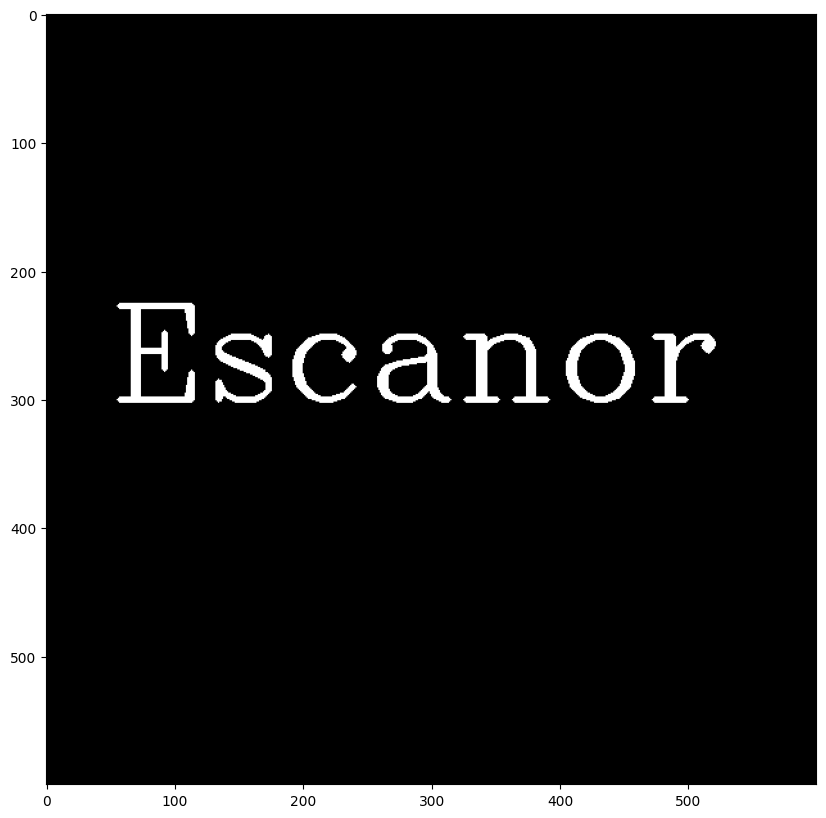

In [15]:
display_img(img)

# Kernel de Erosion

In [16]:
kernel = np.ones((5, 5), np.int8)

In [17]:
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=int8)

In [22]:
erosion1 = cv2.erode(img, kernel, iterations = 1)

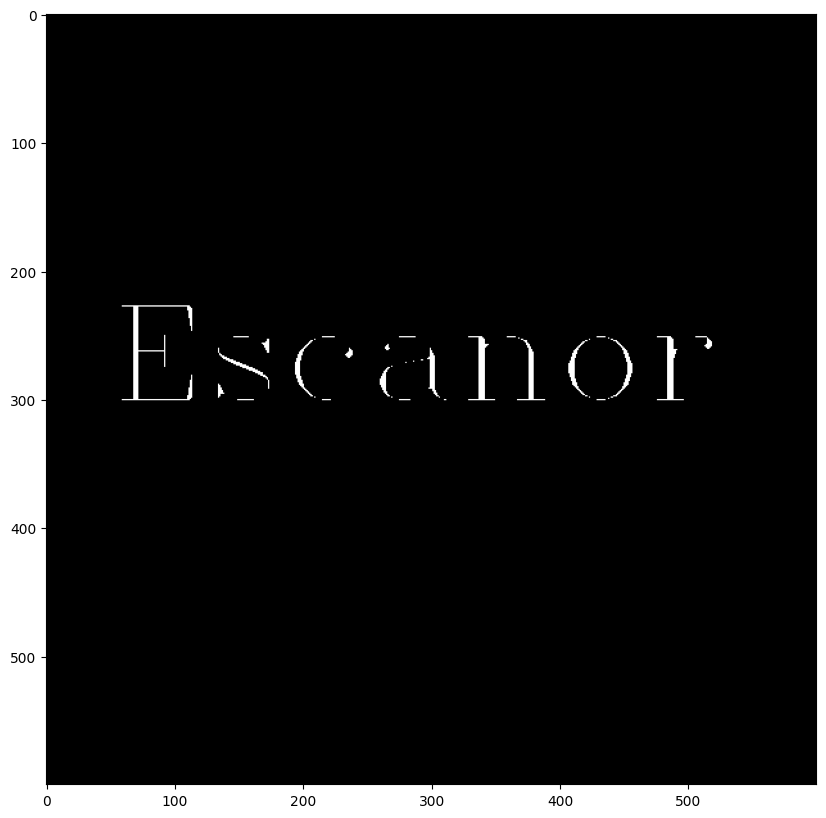

In [23]:
display_img(erosion1)

# Kernel Opening
Agregamos ruido a la imagen para ver mejor como trabaja Opening

In [24]:
img = load_img()

In [25]:
white_noise = np.random.randint(low = 0, high = 2, size = (600, 600))

In [26]:
white_noise

array([[0, 0, 1, ..., 1, 0, 1],
       [0, 0, 1, ..., 1, 0, 0],
       [1, 1, 0, ..., 1, 0, 1],
       ...,
       [1, 1, 0, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 0, 0, 1]], shape=(600, 600))

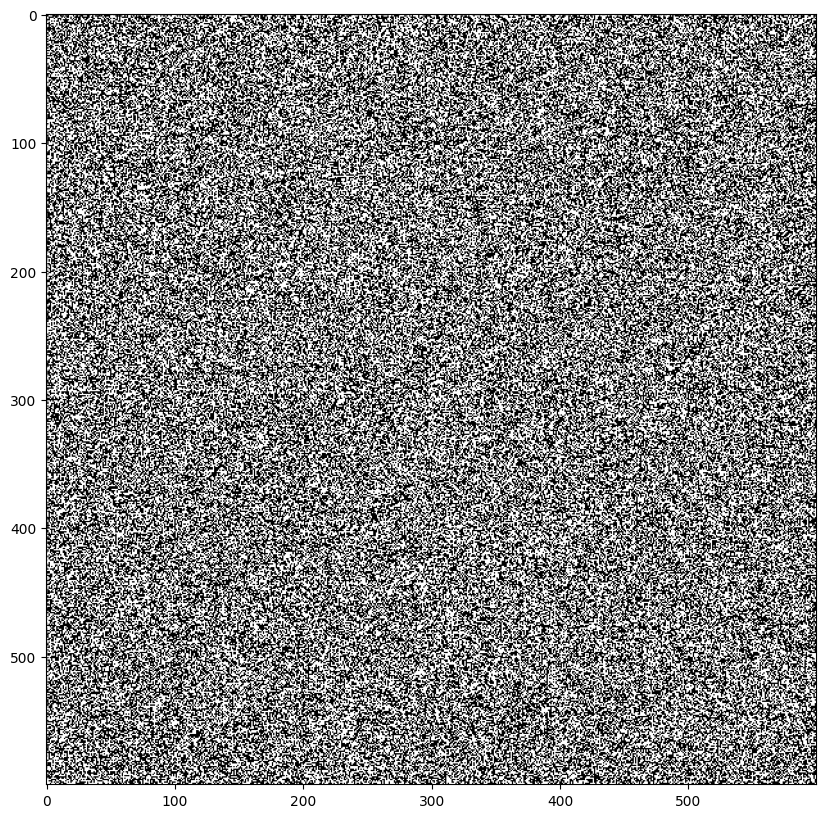

In [27]:
display_img(white_noise)

In [28]:
white_noise = white_noise * 255

In [29]:
white_noise

array([[  0,   0, 255, ..., 255,   0, 255],
       [  0,   0, 255, ..., 255,   0,   0],
       [255, 255,   0, ..., 255,   0, 255],
       ...,
       [255, 255,   0, ..., 255, 255,   0],
       [255, 255, 255, ..., 255, 255,   0],
       [255, 255, 255, ...,   0,   0, 255]], shape=(600, 600))

In [30]:
img_noise = white_noise + img

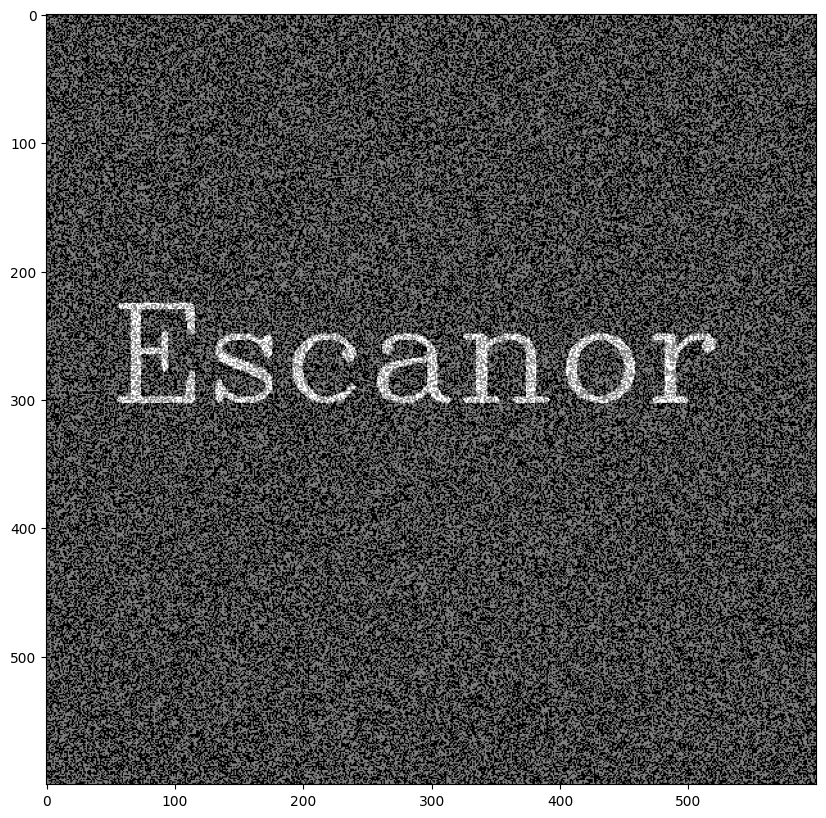

In [31]:
display_img(img_noise)

### Utilizando Opening

In [32]:
opening = cv2.morphologyEx(img_noise, cv2.MORPH_OPEN, kernel)

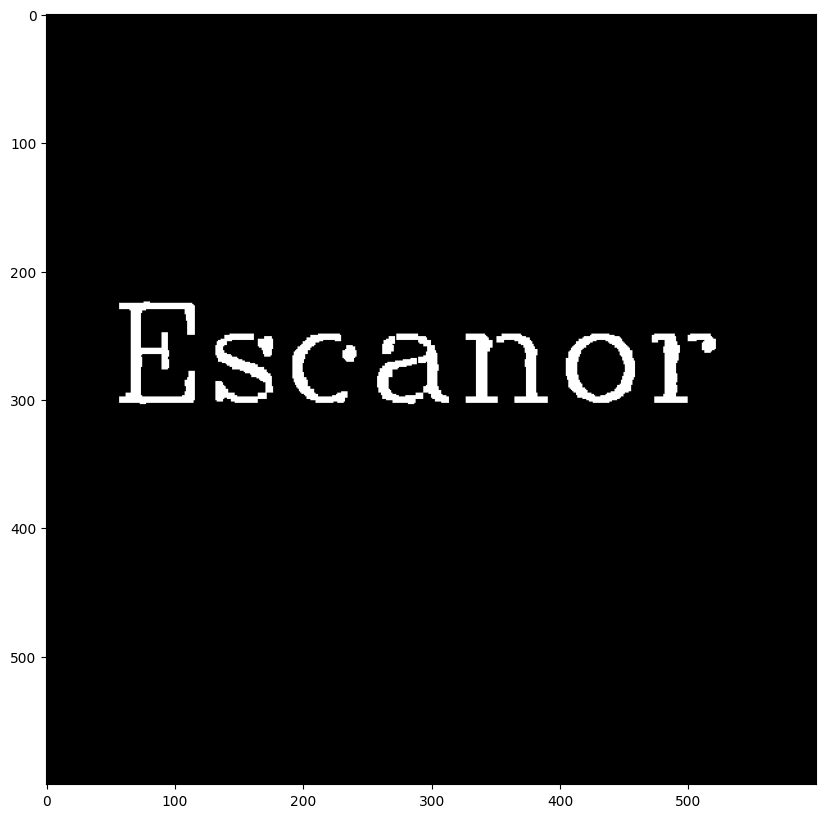

In [33]:
display_img(opening)

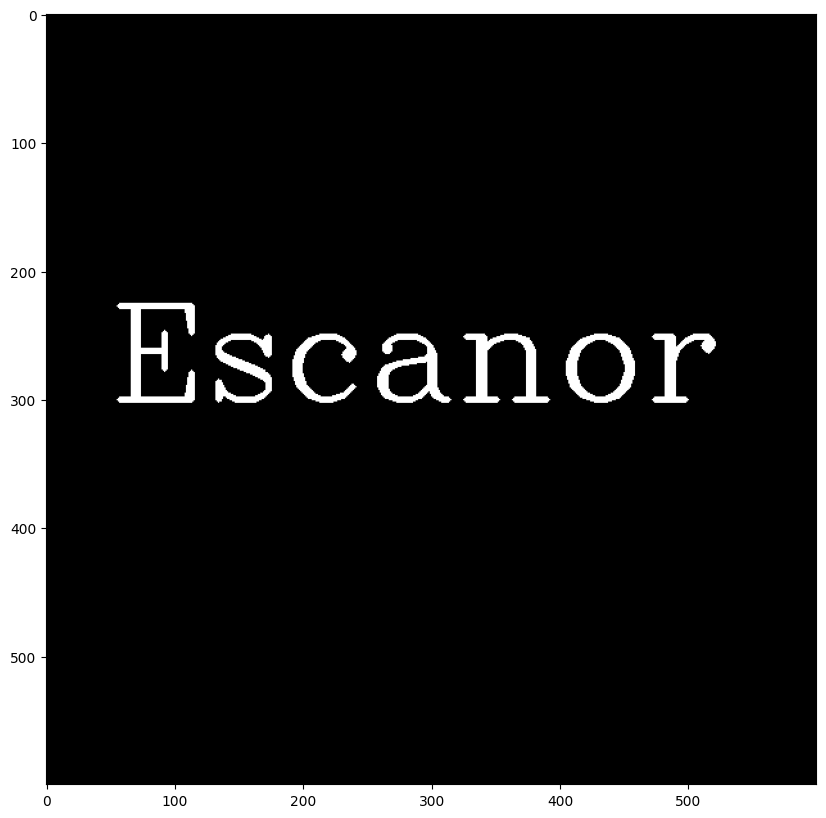

In [34]:
display_img(img)

# Kernel Closing

In [36]:
img = load_img()

In [38]:
black_noise = np.random.randint(low = 0, high = 2, size = (600, 600))

In [39]:
black_noise

array([[0, 0, 1, ..., 0, 0, 1],
       [1, 0, 0, ..., 1, 1, 0],
       [1, 0, 1, ..., 1, 1, 1],
       ...,
       [1, 0, 1, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 1, 0, 0]], shape=(600, 600))

In [40]:
black_noise = black_noise * -255

In [41]:
black_noise_img = img + black_noise

In [42]:
black_noise_img

array([[   0.,    0., -255., ...,    0.,    0., -255.],
       [-255.,    0.,    0., ..., -255., -255.,    0.],
       [-255.,    0., -255., ..., -255., -255., -255.],
       ...,
       [-255.,    0., -255., ...,    0., -255.,    0.],
       [-255.,    0.,    0., ...,    0.,    0., -255.],
       [   0., -255.,    0., ..., -255.,    0.,    0.]], shape=(600, 600))

In [43]:
black_noise_img[black_noise_img == -255] = 0

In [44]:
black_noise_img

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(600, 600))

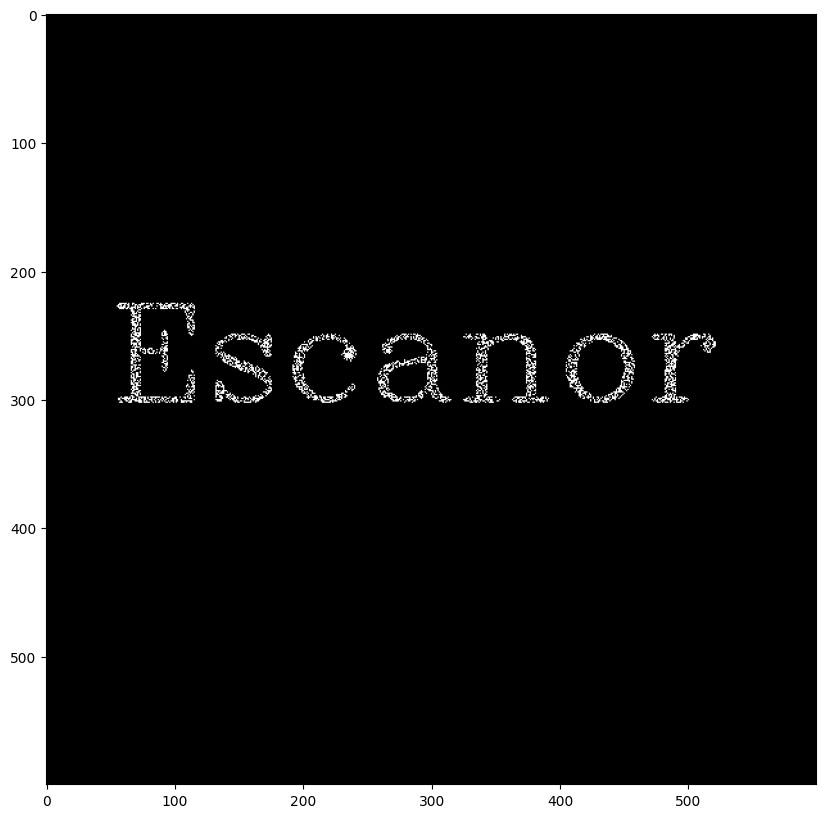

In [45]:
display_img(black_noise_img)

### Aplicando closed

In [47]:
closing = cv2.morphologyEx(black_noise_img, cv2.MORPH_CLOSE, kernel)

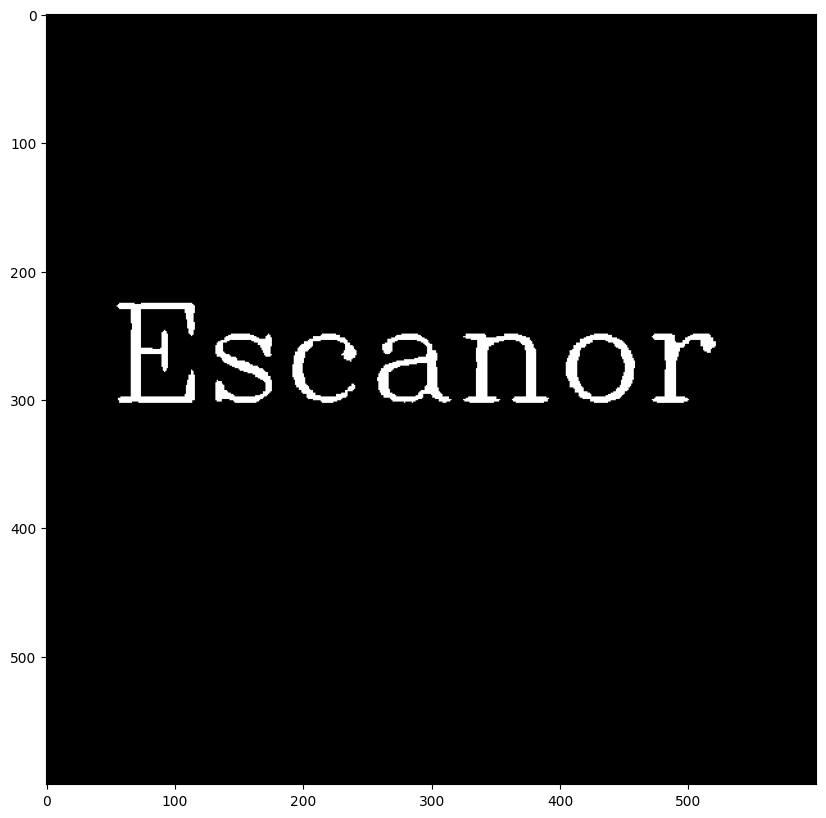

In [48]:
display_img(closing)

# Gradient

In [49]:
img = load_img()

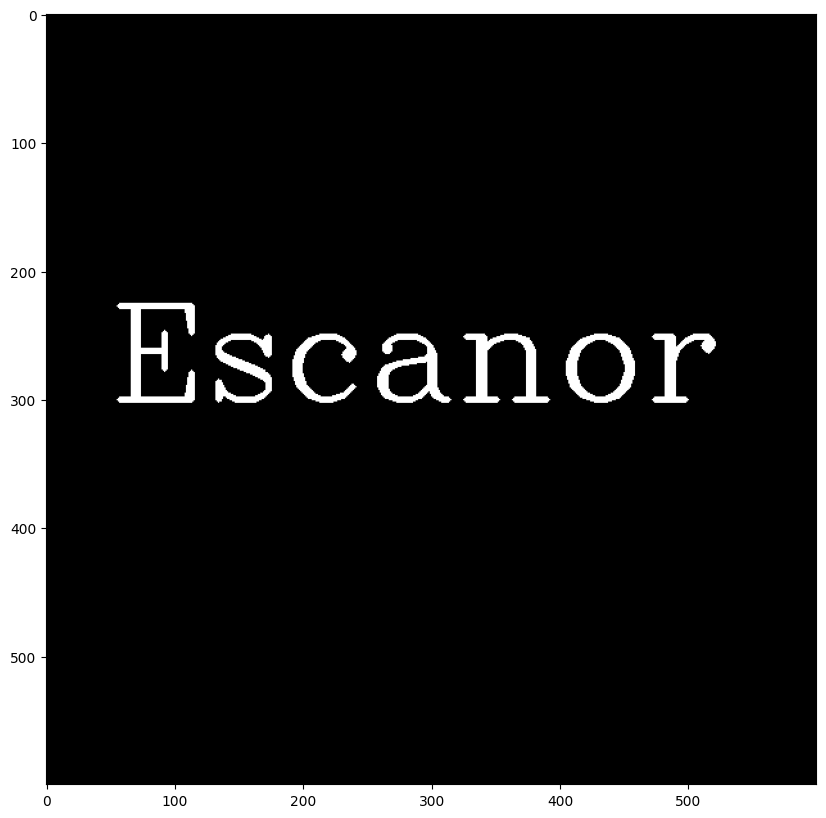

In [50]:
display_img(img)

In [51]:
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)

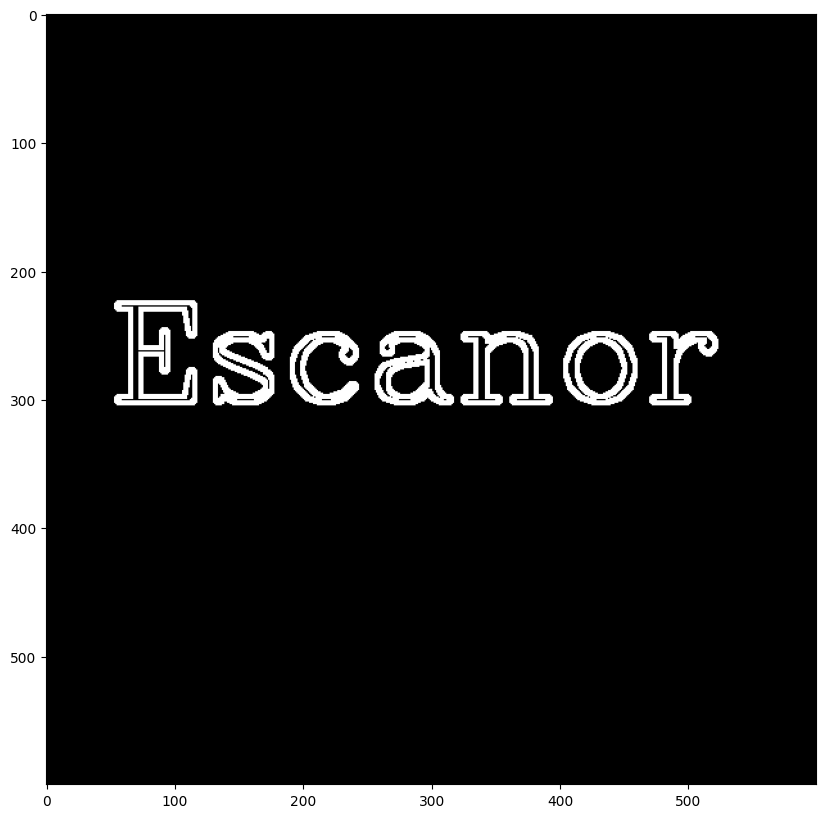

In [52]:
display_img(gradient)